#### Replaced ceil with floor in ...\cornac\eval_methods\ratio_split.py to cater for users with reviews less than 5, after remove duplicates
#### Logic for remove duplicates: if UIR ==UIR (UI==UI, R!=R may be due to different vintage)
#### Final train and test data may have same UI due to same reason

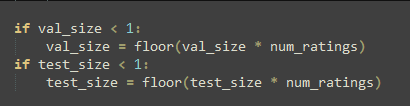

In [1]:

import sys
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import cornac
from cornac.eval_methods import RatioSplit,StratifiedSplit
print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
SEED = 7
VERBOSE = True



FM model is only supported on Linux.
Windows executable can be found at http://www.libfm.org.
System version: 3.7.13 (default, Mar 28 2022, 08:03:21) [MSC v.1916 64 bit (AMD64)]
Cornac version: 1.14.2


In [2]:
url='wine_ratings_all.csv'
df = pd.read_csv(url,sep=",",header=0)
df["rating"]= pd.to_numeric(df["rating"], errors='coerce')
train_df =df.drop_duplicates()
#train_df = df.groupby(["UserID", "ItemID"]).agg({'Rating': ['mean']}).reset_index()
print("Raw count:{}, Unique records: {}".format(len(df),len(train_df)))

Raw count:169348, Unique records: 149452


In [3]:
def value_counts_df(df, col):
    df = pd.DataFrame(df[col].value_counts())
    df.index.name = col
    df.columns = ['count']
    return df
#value_counts_df(train_df,"user_id" )[value_counts_df(train_df,"user_id" )["count"]<5]

In [4]:
ratings= [(x,y,z) for _,x,y,z in train_df.itertuples()]
stratified_split=StratifiedSplit(data=ratings,group_by='user',fmt ="UIR",
                                 test_size=0.2,
                                 #val_size =0.1,
                                 rating_threshold=1.0,
                                 exclude_unknowns=True,
                                 #item_text=item_text_modality,
                                 verbose=VERBOSE,
                                 seed=SEED,
                                 )

rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 5066
Number of items = 39520
Number of ratings = 119922
Max rating = 5.0
Min rating = 1.0
Global mean = 3.9
---
Test data:
Number of users = 4855
Number of items = 9900
Number of ratings = 22492
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5066
Total items = 39520


### write into csv

In [5]:
# Test data:
# Number of users = 4855
#Number of items = 9900
#Number of ratings = 22492
testset= stratified_split.test_set.user_data
df0=pd.DataFrame()
umap=stratified_split.test_set.uid_map
uids=list(stratified_split.train_set.user_ids)
iids=list(stratified_split.train_set.item_ids)
for uidx in testset:
    itms, rtngs= testset[uidx]
    lenth=len(itms)
    for i in range(lenth):
        temp=pd.DataFrame([[uids[uidx],iids[itms[i]], rtngs[i]]])
        #df=pd.DataFrame([[uidx,itms[i], rtngs[i]]])
        df0=pd.concat([df0,temp])
del temp
df0.columns=list(df.columns)
df0.to_csv("test_ratings_unseen.csv", index=False)

In [6]:
# Training data:
# Number of users = 5066
# Number of items = 39520
# Number of ratings = 119922
trainset= stratified_split.train_set.user_data
df1=pd.DataFrame()
umap=stratified_split.train_set.uid_map
uids=list(stratified_split.train_set.user_ids)
iids=list(stratified_split.train_set.item_ids)
for uidx in trainset:
    itms, rtngs= trainset[uidx]
    lenth=len(itms)
    for i in range(lenth):
        temp=pd.DataFrame([[uids[uidx],iids[itms[i]], rtngs[i]]])
        #df=pd.DataFrame([[uidx,itms[i], rtngs[i]]])
        df1=pd.concat([df1,temp])
df1.columns=list(df.columns)
df1.to_csv("train_ratings_seen.csv", index=False)

In [7]:
print(len(df1),len(df0))

119922 22492
